In [1]:
%pylab
import happi

jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd
jet_vals = jetcmap(np.arange(9)) #extract those values as an array 
jet_vals[0] = [1.0, 1, 1.0, 1] #change the first value 
jet_vals[8] = [0.0, 0, 0.0, 1] #change the first value 
newcmap = mpl.colors.LinearSegmentedColormap.from_list("mine", jet_vals) 

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [9]:
wkdir = [
#         '/Volumes/LaCie/Data_Smilei/2020/RAL/DO3d_Ang15_Waist2_Dist5p5_Width3_IonHe_Lz30/',
#         '/Volumes/LaCie/Data_Smilei/2020/RAL/DO3d_Ang15_Waist2_Dist20_Width3_IonHe_Lz30/',
#         '/Volumes/LaCie/Data_Smilei/2020/RAL/FO3d_Ang15_Waist2_Dist5p5_Width3_IonHe_Lz30/',
#         '/Volumes/LaCie/Data_Smilei/2020/RAL/FO3d_Ang15_Waist2_Dist20_Width3_IonHe_Lz30/',
#         '/Volumes/LaCie/Data_Smilei/2020/RAL/SO3d_Ang15_Waist2_Dist5p5_Width3_IonHe_Lz30/',
        '/Volumes/LaCie/Data_Smilei/2020/RAL/DO3d_Ang36_Waist2_Dist5p5_Width3_IonHe_Lz30_Screen_HEB/',
        '/Volumes/LaCie/Data_Smilei/2020/RAL/DO3d_Ang15_Waist2_Dist5p5_Width3_IonHe_Lz30_Screen/',
    
        ]
S0 = happi.Open(wkdir[0], reference_angular_frequency_SI = 2.*np.pi*3e8/1e-6)
S1 = happi.Open(wkdir[1], reference_angular_frequency_SI = 2.*np.pi*3e8/1e-6)
# S2 = happi.Open(wkdir[2], reference_angular_frequency_SI = 2.*np.pi*3e8/1e-6)
# S3 = happi.Open(wkdir[3], reference_angular_frequency_SI = 2.*np.pi*3e8/1e-6)
# S4 = happi.Open(wkdir[4], reference_angular_frequency_SI = 2.*np.pi*3e8/1e-6)

Loaded simulation '/Volumes/LaCie/Data_Smilei/2020/RAL/DO3d_Ang36_Waist2_Dist5p5_Width3_IonHe_Lz30_Screen_HEB/'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Loaded simulation '/Volumes/LaCie/Data_Smilei/2020/RAL/DO3d_Ang15_Waist2_Dist5p5_Width3_IonHe_Lz30_Screen/'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics


In [10]:
# check for resolution dx <= de

ep = 8.9e-12
me = 9.1e-31
qe = 1.6e-19
c  = 3.0e8
nc = 1.1e27

lmd = 1.0e-6   # laser wavelength

ni = S0.namelist.deni * nc
Z0 = 2.0
# ne = Z0*ni
ne = S0.namelist.dene * nc
print('ne = {:.1f} nc'.format(ne/nc))

# lambdal = 1.0
# I0 = 35.
# amp0 = 0.85 * lambdal * np.sqrt(I0)
# print('a0 =', amp0)

wpe = np.sqrt(ne * qe**2 / ep / me)  # relativistic effect \gamma \sim a_0
w0  = c/lmd * 2 * pi
print('wpe = {:.2e}'.format(wpe))
print('w0 = {:.2e}'.format(w0))
de  = c / wpe * 1e6
print('de = {:.4f} um'.format(de))
dx = S0.namelist.Main.cell_length[0]/2./pi
dy = S0.namelist.Main.cell_length[1]/2./pi
# dx = 1.0/64
print('dx = {:.3f} um'.format(dx))
print('dy = {:.3f} um'.format(dy))
# print(1./24)

print('dx / de = {:.3f}'.format(dx/de)) # this should at least be 1, so that the surface current can be reasonably resolved.
print('dy / de = {:.3f}'.format(dy/de)) # this should at least be 1, so that the surface current can be reasonably resolved.

# dee = (ne/nc)**(-0.5)
# print('dee = {:.3f} um'.format(dee))


ne = 7.5 nc
wpe = 5.11e+15
w0 = 1.88e+15
de = 0.0587 um
dx = 0.059 um
dy = 0.059 um
dx / de = 1.000
dy / de = 1.000


In [11]:
## Set the MR region **very** critical

# Now compare the far vs close cases.

dl = S0.namelist.l0
# ts = 25060 #19457
# ts = tm0
# xl = 8*dl;  xr = 12*dl;
# yl = 10*dl; yr = 20*dl;
# zl = 10*dl; zr = 20*dl;   # the box size is increased

xl = 8*dl; xr = 12*dl;
yl = 13*dl; yr = 17*dl;
zl = 13*dl; zr = 17*dl;   # the box size is increased

sum_in = { 'x':[xl,xr],
           'y':[yl,yr],
           'z':[zl,zr], 
         }

In [12]:
ts = S0.ParticleBinning(6).getAvailableTimesteps()
# es0 = S0.ParticleBinning(6,sum=sum_in,units=['um','fs','MeV'],timesteps=ts[-1],data_log=False).getData() #np.log10()
# esx0 = S0.ParticleBinning(6,sum=sum_in,units=['um','fs','MeV'],timesteps=ts[-1]).getAxis('ekin')  # log or not, determined in the namelist
# es4 = S4.ParticleBinning(6,sum=sum_in,units=['um','fs','MeV'],timesteps=ts[-1],data_log=False).getData()
# esx4 = S4.ParticleBinning(6,sum=sum_in,units=['um','fs','MeV'],timesteps=ts[-1]).getAxis('ekin')  # log or not, determined in the namelist

es0 = S0.ParticleBinning(6,sum=sum_in,units=['um','fs','MeV'],timesteps=ts[-1],data_log=False).getData() #np.log10()
esx0 = S0.ParticleBinning(6,sum=sum_in,units=['um','fs','MeV'],timesteps=ts[-1]).getAxis('ekin')  # log or not, determined in the namelist
# es4 = S1.ParticleBinning(6,sum=sum_in,units=['um','fs','MeV'],timesteps=ts[-1],data_log=False).getData()
# esx4 = S1.ParticleBinning(6,sum=sum_in,units=['um','fs','MeV'],timesteps=ts[-1]).getAxis('ekin')  # log or not, determined in the namelist

# es2 = S2.ParticleBinning(6,sum=sum_in,units=['um','fs','MeV'],timesteps=ts[-1],data_log=False).getData()
# esx2 = S2.ParticleBinning(6,sum=sum_in,units=['um','fs','MeV'],timesteps=ts[-1]).getAxis('ekin')  # log or not, determined in the namelist

es1 = S1.ParticleBinning(6,sum=sum_in,units=['um','fs','MeV'],timesteps=ts[-1],data_log=False).getData()
esx1 = S1.ParticleBinning(6,sum=sum_in,units=['um','fs','MeV'],timesteps=ts[-1]).getAxis('ekin')  # log or not, determined in the namelist

# np.savetxt('/Users/yz/Nextcloud/PROJECTS/RAL_2020/ExpDataAnalysis/es0.txt',es0)
# np.savetxt('/Users/yz/Nextcloud/PROJECTS/RAL_2020/ExpDataAnalysis/esx0.txt',esx0)
# np.savetxt('/Users/yz/Nextcloud/PROJECTS/RAL_2020/ExpDataAnalysis/es1.txt',es1)

In [19]:
def postScreen(case,num,time,direction):
    '''
    INPUTS:
    case: which simulation do you want to process
    num:  which one of the screen diag. do you want to use
    time: what time of the data do you want to get
    OUTPUTS:
    Data: the final data you get to plot the spectrum
    '''
    obj = case.Screen(num,units=['um','fs','MeV'])
    rawData = obj.getData()[time]
    sumData = np.sum(rawData,axis=2)
    if direction == 'normal':
        Data = np.sum(sumData[:,27:64],axis=1)
#         Data = np.sum(sumData[:,37:54],axis=1)
    elif direction == 'laser':
        Data = np.sum(sumData[:,:27],axis=1) + np.sum(sumData[:,64:],axis=1)
#         Data = np.sum(sumData[:,:37],axis=1) + np.sum(sumData[:,54:],axis=1)
    else:
        print('"direction" should be either "nomral" or "laser"')
    return Data

In [18]:
es1_18_normal   = postScreen(S1,3,-1,'normal')
es1_18_laser    = postScreen(S1,3,-1,'laser')

In [20]:
es0_18_normal   = postScreen(S0,3,-1,'normal')
es0_18_laser    = postScreen(S0,3,-1,'laser')

In [21]:
from lmfit import Model, Parameters, report_fit
from scipy.special import kn    # modified Bessel function of the second kind

In [41]:
me    = 9.1e-31                       # kg
qe    = 1.6e-19                       # C
c     = 3.0e8                         # m/s
# kT    = 2.0e3                         # keV, E_k? Or E_total?
E0    = 0.511                         # MeV

def maxwellE2(xdata, A, kT):
    return np.log(A*np.sqrt(xdata/np.pi)* kT**(-1.5)*np.exp(-xdata/kT))

def maxwellE(xdata, A, kT):
    """
    en: array of energy, in the unit of keV
    kT: float of temperature, in the unit of keV
    """
    theta = kT / E0
# #     print(theta)
#     if theta < 0.1:
# #         print('Maxwellian')
#         return 2.0*np.sqrt(xdata/np.pi)* kT**(-1.5)*np.exp(-xdata/kT)
#     else:
# #         print('Maxwell-Juttner')
    gam  = 1.0 + xdata/E0
    v    = np.sqrt(1.0 - 1.0/gam**2)*c
    beta = v / c
    return np.log(A * gam**2 * beta / (theta * kn(2, 1.0/theta)) * np.exp(-1.0*gam/theta))

def temp(xdata, A, kT):
    return np.exp(-xdata/kT)*A

start_point = 155 
end_point = 185    # 98： corresponding to 0.511 MeV
                   # 182: corresponding to 1e-4 [14 MeV cutoff]
fitmethod =  'leastsq' #'leastsq' #'tnc' 'cg' 'differential_evolution'

def fitting(case, start, end):
    gmod = Model(temp)
    gmod.set_param_hint('kT', value=2.5, vary=True, min=1.0e-3, max=1.0e1)
    gmod.set_param_hint('A', value=3.0, vary=True, min=1.0e-5, max=1.0e5)
    pars = gmod.make_params()
    result = gmod.fit(case[start:end], xdata=esx0[start:end], method=fitmethod, nan_policy='omit')
    print(result.fit_report())
    print("kT: ", result.values['kT'])
    print("Reduced chi square: ", result.redchi)
    return result.best_fit, result.values['kT'], result.redchi

high_l = 155
# high_r = 175
high_r = 185
low_l  = 100
low_r  = 145

# FB_high_y, FD_high_kT, FD_high_redchi = fitting(es2, high_l, high_r)
DB_high_y, BD_high_kT, BD_high_redchi = fitting(es0_18_normal, high_l, high_r)
DBL_high_y, BDL_high_kT, BDL_high_redchi = fitting(es0_18_laser, high_l, high_r)
# SB_high_y, SD_high_kT, SD_high_redchi = fitting(es4, high_l, high_r)
# FB_low_y, FD_low_kT, FD_low_redchi = fitting(es2, low_l, low_r)
# DB_low_y, BD_low_kT, BD_low_redchi = fitting(es0, low_l, low_r)
# SB_low_y, SD_low_kT, SD_low_redchi = fitting(es4, low_l, low_r)

DBF_high_y, BDF_high_kT, BDF_high_redchi = fitting(es1_18_normal, high_l, high_r)
DBFL_high_y, BDFL_high_kT, BDFL_high_redchi = fitting(es1_18_laser, high_l, high_r)
# DBF_low_y,  BDF_low_kT,  BDF_low_redchi = fitting(es1, low_l, low_r)

# fitcase = es0
# gmod = Model(temp)
# gmod.set_param_hint('kT', value=2.5, vary=True, min=1.0e-3, max=1.0e1)
# gmod.set_param_hint('A', value=3.0, vary=True, min=1.0e-5, max=1.0e5)
# pars = gmod.make_params()
# result = gmod.fit(fitcase[0][start_point:end_point], xdata=esx0[start_point:end_point], method=fitmethod, nan_policy='omit')
# print(result.fit_report())
# print("kT: ", result.values['kT'])
# print("Reduced chi square: ", result.redchi)

# fitcase = es4
# gmod2 = Model(temp)
# gmod2.set_param_hint('kT', value=2.5, vary=True, min=1.0e-3, max=1.0e1)
# gmod2.set_param_hint('A', value=3.0, vary=True, min=1.0e-5, max=1.0e5)
# pars2 = gmod2.make_params()
# result2 = gmod2.fit(fitcase[0][start_point:end_point], xdata=esx0[start_point:end_point], method=fitmethod, nan_policy='omit')
# print(result2.fit_report())
# print("kT: ", result2.values['kT'])
# print("Reduced chi square: ", result2.redchi)

[[Model]]
    Model(temp)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 34
    # data points      = 30
    # variables        = 2
    chi-square         = 1.3518e-11
    reduced chi-square = 4.8279e-13
    Akaike info crit   = -848.845643
    Bayesian info crit = -846.043248
[[Variables]]
    A:   3.3606e-04 +/- 8.8623e-06 (2.64%) (init = 3)
    kT:  2.80952664 +/- 0.03336730 (1.19%) (init = 2.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, kT) = -0.982
kT:  2.809526637286626
Reduced chi square:  4.827897044605287e-13
[[Model]]
    Model(temp)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 30
    # variables        = 2
    chi-square         = 1.4923e-12
    reduced chi-square = 5.3296e-14
    Akaike info crit   = -914.957332
    Bayesian info crit = -912.154937
[[Variables]]
    A:   2.3247e-04 +/- 2.1950e-06 (0.94%) (init = 3)
    kT:  3.12613970 +/- 0.01448493 (0.46%) (init = 

In [42]:
plt.rc('text', usetex=False)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 16
# mpl.rcParams['legend.fontname'] = 'Comic Sans MS'
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['lines.linewidth'] = 2

width  = 3.14 * 2  # single column, 8cm
height = width

fig, ax = plt.subplots()
fig.subplots_adjust(left=.2, bottom=.2, right=.9, top=.9)

def func(x,A,kT):
    return np.exp(-x/kT)*A

index = (esx4 < 20.0)*(esx0 > 5.0)
x2 = esx4[index]
y2 = func(x2,0.02,2.3)

# ax.semilogy(esx0, es2[0][:], '-k', linewidth=2.0, label='F.B.')
# ax.semilogy(esx0, es0[0][:], '-r', linewidth=2.0, label='D.B.')
# ax.semilogy(esx0, es1[0][:], '-g', linewidth=2.0, label='D.B.F')
# ax.semilogy(esx0, es4[0][:], '-b', linewidth=2.0, label='S.B.')

# ax.semilogy(esx0[high_l:high_r], FB_high_y, '--k', linewidth=3.0, markersize=6, mfc='none',mew=1, label='Thermal {:.2f} MeV (R.C.={:.1e})'.format(FD_high_kT, FD_high_redchi))
# ax.semilogy(esx0[high_l:high_r], DB_high_y, '--r', linewidth=3.0, markersize=6, mfc='none',mew=1, label='Thermal {:.2f} MeV (R.C.={:.1e})'.format(BD_high_kT, BD_high_redchi))
# ax.semilogy(esx0[high_l:high_r], SB_high_y, '--b', linewidth=3.0, markersize=6, mfc='none',mew=1, label='Thermal {:.2f} MeV (R.C.={:.1e})'.format(SD_high_kT, SD_high_redchi))
# ax.semilogy(esx0[high_l:high_r], DBF_high_y, '--g', linewidth=3.0, markersize=6, mfc='none',mew=1, label='Thermal {:.2f} MeV (R.C.={:.1e})'.format(BDF_high_kT, BDF_high_redchi))

# ax.semilogy(esx0[low_l:low_r], FB_low_y, ':k', linewidth=3.0, markersize=6, mfc='none',mew=1, label='Thermal {:.2f} MeV (R.C.={:.1e})'.format(FD_low_kT, FD_low_redchi))
# ax.semilogy(esx0[low_l:low_r], DB_low_y, ':r', linewidth=2.0, markersize=6, mfc='none',mew=1, label='Thermal {:.2f} MeV (R.C.={:.1e})'.format(BD_low_kT, BD_low_redchi))
# ax.semilogy(esx0[low_l:low_r], SB_low_y, ':b', linewidth=3.0, markersize=6, mfc='none',mew=1, label='Thermal {:.2f} MeV (R.C.={:.1e})'.format(SD_low_kT, SD_low_redchi))
# ax.semilogy(esx0[low_l:low_r], DBF_low_y, ':g', linewidth=1.0, markersize=6, mfc='none',mew=1, label='Thermal {:.2f} MeV (R.C.={:.1e})'.format(BDF_low_kT, BDF_low_redchi))

# ax.semilogy(x2, y2, '-r')

ax.semilogy(esx0, es0_18_normal/es0_18_normal.max(), '-r', linewidth=2.0, label='36, normal')
ax.semilogy(esx0[high_l:high_r], DB_high_y/es0_18_normal.max(), '--r', linewidth=3.0, markersize=6, mfc='none',mew=1, label='Thermal {:.2f} MeV (R.C.={:.1e})'.format(BD_high_kT, BD_high_redchi))
ax.semilogy(esx0, es1_18_normal/es1_18_normal.max(), '-b', linewidth=2.0, label='15, normal')
ax.semilogy(esx0[high_l:high_r], DBF_high_y/es1_18_normal.max(), '--b', linewidth=3.0, markersize=6, mfc='none',mew=1, label='Thermal {:.2f} MeV (R.C.={:.1e})'.format(BDF_high_kT, BDF_high_redchi))
ax.semilogy(esx0, es0_18_laser/es0_18_laser.max(), '-c', linewidth=2.0, label='36, laser')
ax.semilogy(esx0[high_l:high_r], DBL_high_y/es0_18_laser.max(), '--c', linewidth=3.0, markersize=6, mfc='none',mew=1, label='Thermal {:.2f} MeV (R.C.={:.1e})'.format(BDL_high_kT, BDL_high_redchi))
ax.semilogy(esx0, es1_18_laser/es1_18_laser.max(), '-m', linewidth=2.0, label='15, laser')
ax.semilogy(esx0[high_l:high_r], DBFL_high_y/es1_18_laser.max(), '--m', linewidth=3.0, markersize=6, mfc='none',mew=1, label='Thermal {:.2f} MeV (R.C.={:.1e})'.format(BDFL_high_kT, BDFL_high_redchi))


# kT0 = 4.0*E0
# ax.semilogx(esx0, np.log10(maxwellE2(esx0, kT0)), 'om', markersize=6, mfc='none',mew=1,label='{:.1f} MeV'.format(kT0))

ax.set_xlim(0.5, 30.0)
ax.set_ylim(1e-4, 1)
leg = ax.legend(loc='best', numpoints=1, fancybox=False, fontsize=12, frameon=False)
leg._legend_box.align = "right"
ax.set_xlabel(r'$E_k$ (MeV)',fontsize=12)
ax.set_ylabel('dN/dE (No./MeV)',fontsize=12)
ax.tick_params(axis='both',which='major', direction='out',labelsize=12)

ax.minorticks_off()
fig.set_size_inches(width, height)

# fig.savefig('/Users/yz/Desktop/'+'EneSpec_fitted'+'.png',bbox_inches='tight',dpi=600)
# plt.show()

In [44]:
from scipy import interpolate
f_cas = interpolate.interp1d(esx0, fitcase[0])    # Interpolate the simulation result

N = 100000  # use the same number of primary particles
vec_next = np.linspace(esx0[start_point],esx0[end_point],N)
dNdE_next = f_cas(vec_next)    # generate the cascaded data points

width  = 3.14 * 2  # single column, 8cm
height = width

fig, ax = plt.subplots()
fig.subplots_adjust(left=.2, bottom=.2, right=.9, top=.9)

ax.loglog(esx0, fitcase[0][:], '-b', linewidth=3.0, label='S.B.')
ax.loglog(vec_next, dNdE_next, '--r', linewidth=3.0, label='interpolated')

ax.set_xlim(0.02, 15.0)
ax.set_ylim(1e-4, 10)
leg = ax.legend(loc='best', numpoints=1, fancybox=False, fontsize=12, frameon=False)
leg._legend_box.align = "right"
ax.set_xlabel(r'$E_k$ (MeV)',fontsize=12)
ax.set_ylabel('dN/dE (No./MeV)',fontsize=12)
ax.tick_params(axis='both',which='major', direction='out',labelsize=12)

ax.minorticks_off()
fig.set_size_inches(width, height)

In [290]:
esx0[start_point]
esx0[end_point]

24.071294049078553

In [285]:
# write the interpolated data into file
import os
from random import uniform
plt.ion()

directory = './PIC_SB/'
if not os.path.exists(directory):
    os.mkdir(directory)


outputname = directory+'f01e01'
E0 = 0.511                # MeV
c  = 29979245800          # cm/s
me = 9.1e-31              # kg
qe = 1.6e-19              # C

# start = np.nonzero(fitcase[-1])[0][0]   # the index of the first non-zero elements in dNdE
# end   = np.nonzero(fitcase[-1])[0][-1]
# start = 59
# end   = 167
maxf  = esx0[(start_point+np.argmax(fitcase[-1][start_point:end_point]))]  # the energy corresponding to the maximum value in y-axis [keV]

selected = []
i = 0
while len(selected) < N:
#     i = i+1
#     print(i)
    en = uniform(esx0[start], esx0[end])   # unit from MeV 
    f = uniform(0, f_cas(maxf)*1.1)
    if f <= f_cas(en):
        selected.append(en)

1. energy range
2. N1 (PIC) -- real, important
3. interpolation (N2)
4. MC Generator (N2) -- number of prim. in FLUKA
5. 1 Part./Prim. -> N1/N2

In [276]:
### Now that we get the energy, we calculate the vx accordingly.
### But careful that now there are both relativistic and non-relativistic electrons

## define the arrays
arr_selected = np.array(selected)
gam = np.ones_like(arr_selected)
vx  = np.zeros_like(arr_selected)

## deal with the relativistic ones
mask_rel = arr_selected > E0
gam[mask_rel] = arr_selected[mask_rel]/E0
vx[mask_rel]  = np.sqrt(1.0-1.0/gam[mask_rel]**2)*c
## deal with the non-relativistic ones
mask_nonrel = arr_selected < E0
vx[mask_nonrel] = np.sqrt(1.0*arr_selected[mask_nonrel]*1e6*qe/me)*1e2   # cm/s

# gam = np.array(selected)/E0      # gam should not be less than 1 !!!!
# vx = np.sqrt(1.0-1.0/gam**2)*c

In [287]:
def energy_spectrum(res, ekin):
        """
        res: the resolution of the energy bin in the spectrum
        ekin: the array of the energy for a certain specie
        """
        import numpy as np
        nbin = res
        emax = ekin.max()
        emin = ekin.min()
        ww = np.ones(np.size(ekin))

        de   = (emax-emin)/nbin

        ee   = np.logspace(np.log10(emin+1),np.log10(emax),nbin+1)
        nn   = np.zeros(nbin)

        for j in range(1,nbin+1):
                rr = np.where((ekin > ee[j-1]) & (ekin < ee[j]))
                nn[j-1] = np.sum(ww[rr])

        N = np.sum(nn)
        return ee, nn
    

In [295]:
arr_selected = np.array(selected)
# eee, nnn = energy_spectrum(200, arr_selected)
# dnndee   = nnn/(eee[1:]-eee[:-1])

width  = 3.14 * 2  # single column, 8cm
height = width

fig, ax = plt.subplots()
fig.subplots_adjust(left=.2, bottom=.2, right=.9, top=.9)

ax.loglog(esx0, fitcase[0][:], '-b', linewidth=3.0, label='S.B.')
ax.loglog(vec_next, dNdE_next, '--r', linewidth=3.0, label='interpolated')
xx, yy = np.histogram(arr_selected,100,density=True)
ax.loglog(yy[:-1], xx/1.7, 'om', label='MC generated. & normed.')
# ax.loglog(eee[:-1], dnndee/dnndee.max(), '-.b', label='MC generated. & normed.')

# ax.set_xlim(0.02, 15.0)
# ax.set_ylim(1e-4, 10)
leg = ax.legend(loc='best', numpoints=1, fancybox=False, fontsize=12, frameon=False)
leg._legend_box.align = "right"
ax.set_xlabel(r'$E_k$ (MeV)',fontsize=12)
ax.set_ylabel('dN/dE (No./MeV)',fontsize=12)
ax.tick_params(axis='both',which='major', direction='out',labelsize=12)

ax.minorticks_off()
fig.set_size_inches(width, height)
fig.savefig('/Users/yz/Desktop/'+'EneSpec_MC'+'_SB.png',bbox_inches='tight',dpi=600)

# plt.plot(vec1[-1]*1e3, dNdE1[-1], '-', color='purple', label='bdxeOUT')
# plt.plot(vec_next, dNdE_next, '--r', label='interpolated')
# plt.plot(eee[:-1], dnndee/dnndee.max(), '-.b', label='MC generated. & normed.')
# plt.yscale('log')
# plt.xscale('log')
# # plt.xlim((ve1[0],ve2[-1]))
# plt.xlabel('$E_k$ [keV]')
# plt.ylabel(r'$\frac{\mathrm{d}N}{\mathrm{d}E}$ [MeV$^{-1}$pr$^{-1}$]')
# plt.legend()

# plt.savefig(outbasename+'_benchmark_interpolation_MCgenerated.png')

In [277]:
g=open(outputname,'w')
g.write('FlukaType 03\n')
g.write('Diag  2 d exportation particules d espece 4 sur processeur    1, energie comprise entre  1.000E+04 et  1.000E+10 keV\n')
g.write('dim_cas = 5\n')
g.write('(** : poids donne en unites nc*(c/w0)^2)\n')
g.write('  x  (c/w0)    y  (c/w0)     E  (keV)   poids (**)    vx (cm/s)    vy (cm/s)    vz (cm/s)    t  (1/w0) \n')

i = 0
while i < N:
    x = 10.0
    y = 0.000000001
    w = 1.0
    vy = 0.0
    vz = 0.0
    t = 1.0

    newfln = "{: .5E}".format(x) + ' '+ "{: .5E}".format(y)+' '+ "{: .5E}".format(selected[i])+' '+ "{: .5E}".format(w) + ' ' +"{: .5E}".format(vx[i])+' '+"{: .5E}".format(vy)+' '+"{: .5E}".format(vz)+' '+ "{: .5E}".format(t)+'\n'
    g.write(newfln)
    i = i +1

g.close()

In [10]:
# check for averaged fields: Ex, Bx, Bz, Jx, Jy, Jz in yz-plane, at a certain x-position found above

# JxEx    : work done by MR-induced Ex, **averaged along x at a certain region** 
# Bx      : same place
# Ex      : same place

# xl = S0.namelist.l0*4.0

Ex0 = S0.Field(1, 'Ex', 
         figsize=[4,4],
         units=['um','fs'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         average={'x':[xl,xr]},
         aspect='equal',
         cmap='seismic',
#          cmap='hot_r',
         vmin = -0.2, vmax=0.2,
               xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='',
        )

Bx0 = S0.Field(1, 'Bx', 
         figsize=[4,4],
         units=['um','fs'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         average={'x':[xl,xr]},
         aspect='equal',
#          cmap='seismic',
         cmap='seismic',
         vmin = -0.5, vmax=0.5,
               xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='',
        )

JE0 = S0.Field(1, 'Jx*Ex', 
         figsize=[4,4],
         units=['um','fs'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         average={'x':[xl,xr]},
         aspect='equal',
#          cmap='seismic',
         cmap='plasma',
#          cmap=newcmap,
         vmin = 0, vmax=0.06,
               xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='',
        )

Ex1 = S2.Field(1, 'Ex', 
         figsize=[4,4],
         units=['um','fs'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         average={'x':[xl,xr]},
         aspect='equal',
         cmap='seismic',
#          cmap='hot_r',
         vmin = -0.2, vmax=0.2,
               xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='',
        )

Bx1 = S2.Field(1, 'Bx', 
         figsize=[4,4],
         units=['um','fs'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         average={'x':[xl,xr]},
         aspect='equal',
#          cmap='seismic',
         cmap='seismic',
         vmin = -0.5, vmax=0.5,
               xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='',
        )

JE1 = S2.Field(1, 'Jx*Ex', 
         figsize=[4,4],
         units=['um','fs'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         average={'x':[xl,xr]},
         aspect='equal',
#          cmap='seismic',
         cmap='plasma',
#          cmap=newcmap,
         vmin = 0, vmax=0.06,
               xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='',
        )

happi.multiPlot(JE0, JE1,
                 Ex0, Ex1,
                 Bx0, Bx1,
                 shape=[3,2],
                figsize=[6,10],
               skipAnimation=True,
               timesteps=7192,
                saveAs='/Users/yz/Desktop/MR_features_2v4.pdf'
               )



In [8]:
S2.Field(1).getAvailableTimesteps()

array([  116.,   706.,  1295.,  1885.,  2475.,  3064.,  3654.,  4243.,
        4833.,  5423.,  6012.,  6602.,  7192.,  7781.,  8371.,  8961.,
        9550., 10140., 10729., 11319., 11909., 12498., 13088., 13678.,
       14267., 14857., 15446., 16036., 16626., 17215.])

In [13]:
# hot-electron enhancement around MR-zone.
# electron density distribution
# electron energy density distribution

# xl = S0.namelist.l0*4.0

ne0 = S0.ParticleBinning(3, 
         figsize=[4,4],
         units=['um','fs','cm^-3'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         sum={'x':[xl,xr]},
         aspect='equal',
         data_log=True,
         cmap=newcmap,
         vmin=20, vmax=22,
               xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='',
#                ylabel='',
#                          timesteps=24477,
        )
# .plot(saveAs=wkdir[0]+str(ts)+'den.png')

enden0 = S0.ParticleBinning(4, 
         figsize=[4,4],
         units=['um','fs','MeV cm^-3'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         sum={
             'x':[xl,xr],
             'ekin':[2.0,20],
         },
         aspect='equal',
         data_log=True,
         cmap=newcmap,
         vmin=20, vmax=22,
               xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='',
#                ylabel='',
#                          timesteps=24477,
        )
# .plot(saveAs=wkdir[0]+str(ts)+'enden.png')

ne1 = S2.ParticleBinning(3, 
         figsize=[4,4],
         units=['um','fs','cm^-3'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         sum={'x':[xl,xr]},
         aspect='equal',
         data_log=True,
         cmap=newcmap,
         vmin=20, vmax=22,
                         xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='',
        )
# .plot(saveAs=wkdir[0]+str(ts)+'den.png')
enden1 = S2.ParticleBinning(4, 
         figsize=[4,4],
         units=['um','fs','MeV cm^-3'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         sum={
             'x':[xl,xr],
             'ekin':[2,20],
         },
         aspect='equal',
         data_log=True,
         cmap=newcmap,
         vmin=20, vmax=22,
                            xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='',
        )
# .plot(saveAs=wkdir[0]+str(ts)+'enden.png')
happi.multiPlot(ne0, ne1,
                 enden0, enden1,
                 shape=[2,2],
                figsize=[8,8],
                timesteps=8371,
                saveAs='/Users/yz/Desktop/HEB_enhance_2v4.pdf'
               )

In [19]:
ts = S0.ParticleBinning(6).getAvailableTimesteps()
es0 = S0.ParticleBinning(6,sum=sum_in,units=['um','fs','MeV'],timesteps=ts[-1],data_log=False).getData()
esx0 = S0.ParticleBinning(6,sum=sum_in,units=['um','fs','MeV'],timesteps=ts[-1],data_log=True).getAxis('ekin')
es1 = S2.ParticleBinning(6,sum=sum_in,units=['um','fs','MeV'],timesteps=ts[-1],data_log=False).getData()
esx1 = S2.ParticleBinning(6,sum=sum_in,units=['um','fs','MeV'],timesteps=ts[-1],data_log=True).getAxis('ekin')

plt.rc('text', usetex=False)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 16
# mpl.rcParams['legend.fontname'] = 'Comic Sans MS'
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['lines.linewidth'] = 2

width  = 3.14  # single column, 8cm
height = width

fig, ax = plt.subplots()
fig.subplots_adjust(left=.2, bottom=.2, right=.9, top=.9)

ax.loglog(esx0, es0[0][:], '-r', label='double beams')
ax.loglog(esx1, es1[0][:], '--b', label='quatre beams')

def func(x,kbT):
    edrift = 0.
    return x*np.sqrt(x)*np.exp(-(x-edrift)**2/kbT) 

index = (esx0 < 16.0)*(esx0 > 0.1)
y3 = func(esx0[index], 3e6/1e6)
# ax.loglog(esx0[index], y3, color='red',linestyle='dashdot',label='Thermal proton 200 eV')

ax.set_xlim(0.1, 30.0)
ax.set_ylim(1e-6, 10)
leg = ax.legend(loc='best', numpoints=1, fancybox=False, fontsize=12, frameon=False)
leg._legend_box.align = "right"
ax.set_xlabel(r'$E_k$ (MeV)',fontsize=12)
ax.set_ylabel('dN/dE (No./MeV)',fontsize=12)
ax.tick_params(axis='both',which='both', direction='out',labelsize=12)
ax.grid(linestyle='--')

# ax.minorticks_off()
fig.set_size_inches(width, height)

fig.savefig('/Users/yz/Desktop/'+'EneSpec_end_2v4'+'.pdf',bbox_inches='tight',dpi=300)
# plt.show()

In [128]:
S2.ParticleBinning(6,units=['fs']).getTimes()

array([  0.        ,  33.3526335 ,  66.64873711, 100.00137061,
       133.35400411, 166.65010772, 200.00274122, 233.29884483,
       266.65147833, 300.00411183, 333.30021544, 366.65284894,
       400.00548244, 433.30158605, 466.65421955, 500.00685304,
       533.30295666, 566.65559015, 599.95169377, 633.30432726,
       666.65696076, 699.95306438, 733.30569787, 766.65833137,
       799.95443498, 833.30706848, 866.60317209, 899.95580559,
       933.30843909, 966.6045427 , 999.9571762 ])

In [129]:
S2.ParticleBinning(6).getAvailableTimesteps()

array([    0,   590,  1179,  1769,  2359,  2948,  3538,  4127,  4717,
        5307,  5896,  6486,  7076,  7665,  8255,  8845,  9434, 10024,
       10613, 11203, 11793, 12382, 12972, 13562, 14151, 14741, 15330,
       15920, 16510, 17099, 17689])

In [20]:
ts = S0.ParticleBinning(5).getAvailableTimesteps()
es0 = S0.ParticleBinning(5,sum=sum_in,units=['um','fs','MeV'],timesteps=ts[-1],data_log=False).getData()
esx0 = S0.ParticleBinning(5,sum=sum_in,units=['um','fs','MeV'],timesteps=ts[-1],data_log=False).getAxis('user_function')
es1 = S2.ParticleBinning(5,sum=sum_in,units=['um','fs','MeV'],timesteps=ts[-1],data_log=False).getData()
esx1 = S2.ParticleBinning(5,sum=sum_in,units=['um','fs','MeV'],timesteps=ts[-1],data_log=False).getAxis('user_function')

plt.rc('text', usetex=False)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 16
# mpl.rcParams['legend.fontname'] = 'Comic Sans MS'
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['lines.linewidth'] = 1

width  = 3.14  # single column, 8cm
height = width

fig, ax = plt.subplots()
fig.subplots_adjust(left=.2, bottom=.2, right=.9, top=.9)

# ax.plot(esx0, es0[0][:]/es0[0][:].max(), '-r', label='Case 3')
# ax.plot(esx1, es1[0][:]/es1[0][:].max(), '--b', label=r'Case 1$^{*}$')

ax.plot(esx0, es0[0][:], '-r', label='double beams')
ax.plot(esx1, es1[0][:], '--b', label='quatre beams')

# ax.set_xlim(-90, 90)
# ax.set_xticks([-90, -45, 0, 45, 90])
# ax.set_ylim(0.90, 1.0)
# leg = ax.legend(loc='best', numpoints=1, fancybox=False, fontsize=12, frameon=False)
# leg._legend_box.align = "right"
ax.set_xlabel(r'$\theta=arctan(P_y/P_x)$ (degree)',fontsize=12)
ax.set_ylabel('Relative Part. Number',fontsize=12)
ax.tick_params(axis='both',which='major', direction='out',labelsize=12)
ax.grid(linestyle='--')

ax.minorticks_off()
fig.set_size_inches(width, height)

fig.savefig('/Users/yz/Desktop/'+'Angular_end_2v4'+'.pdf',bbox_inches='tight',dpi=300)
# plt.show()

In [154]:
# angualr distribution
# z: 5 
# y: 7
# 100fs: 4422
# 500fs: 22112
# 700fs: 30957
# ts = 8845
pypx0 = S2.ParticleBinning('#5*1.5',units=['fs'],label='Case 3',color='red',sum=sum_in)
# pzpx = S0.ParticleBinning(7,units=['fs'],label='pz/px')
pypx1 = S3.ParticleBinning(5,units=['fs'],label=r'Case 1$^{*}$',color='blue',linestyle='--',sum=sum_in)
happi.multiPlot(pypx0,
#                 pzpx,
                pypx1,
                timesteps=ts[-10],
               saveAs=wkdir[0]+'angular'+str(ts[-5])+'.png'
               )

In [155]:
sum_in

{'x': [50.26548245743669, 75.39822368615503],
 'y': [62.83185307179586, 125.66370614359172],
 'z': [62.83185307179586, 125.66370614359172]}

In [182]:
a = S3.ParticleBinning(5,sum=sum_in,units=['fs'],timesteps=ts[-1]).getData()

In [185]:
a[0][:].max()

0.007043678286073605

In [172]:
np.shape(a)

(31, 360)

In [163]:
a

[]

# Laser absorption rate

In [5]:
S3.Scalar()

Diagnostic is invalid
Error: no scalar chosen
Printing available scalars:
---------------------------
Ubal_norm	Ubal	Utot	Uexp	Ukin	Urad
UmBWpairs	Uelm
Ukin_bnd	Ukin_out_mvw	Ukin_inj_mvw
Uelm_bnd	Uelm_out_mvw	Uelm_inj_mvw
Dens_ion	Ntot_ion	Zavg_ion	Ukin_ion	Urad_ion	Dens_eon	Ntot_eon	Zavg_eon	Ukin_eon	Urad_eon
Dens_prei	Ntot_prei	Zavg_prei	Ukin_prei	Urad_prei
Dens_pree	Ntot_pree	Zavg_pree	Ukin_pree	Urad_pree
Uelm_Ex	Uelm_Ey	Uelm_Ez	Uelm_Bx_m	Uelm_By_m	Uelm_Bz_m
ExMin	ExMinCell	ExMax	ExMaxCell
EyMin	EyMinCell	EyMax	EyMaxCell
EzMin	EzMinCell	EzMax	EzMaxCell
Bx_mMin	Bx_mMinCell	Bx_mMax	Bx_mMaxCell
By_mMin	By_mMinCell	By_mMax	By_mMaxCell
Bz_mMin	Bz_mMinCell	Bz_mMax	Bz_mMaxCell
JxMin	JxMinCell	JxMax	JxMaxCell
JyMin	JyMinCell	JyMax	JyMaxCell
JzMin	JzMinCell	JzMax	JzMaxCell
RhoMin	RhoMinCell	RhoMax	RhoMaxCell
PoyXmin	PoyXminInst	PoyYmin	PoyYminInst	PoyZmin	PoyZminInst	PoyXmax	PoyXmaxInst	PoyYmax	PoyYmaxInst	PoyZmax	PoyZmaxInst


In [26]:
Ttot0 = S0.Scalar('Utot',units=['fs','J'],color='red').getTimes()[:]
Ttot2 = S2.Scalar('Utot',units=['fs','J'],color='red').getTimes()[:]

utot0 = S0.Scalar('Utot',units=['fs','J'],color='red').getData()[:]
ukin0 = S0.Scalar('Ukin',units=['fs','J'],color='red').getData()[:]
ulas0 = S0.Scalar('Uelm_bnd',units=['fs','J'],color='red',linestyle='solid').getData()[:]

utot1 = S1.Scalar('Utot',units=['fs','J'],color='red').getData()[:]
ukin1 = S1.Scalar('Ukin',units=['fs','J'],color='red').getData()[:]
ulas1 = S1.Scalar('Uelm_bnd',units=['fs','J'],color='red',linestyle='solid').getData()[:]

utot2 = S2.Scalar('Utot',units=['fs','J'],color='red').getData()[:]
ukin2 = S2.Scalar('Ukin',units=['fs','J'],color='red').getData()[:]
ulas2 = S2.Scalar('Uelm_bnd',units=['fs','J'],color='red',linestyle='solid').getData()[:]

# utot3 = S3.Scalar('Utot',units=['fs','J'],color='red').getData()[:]
# ukin3 = S3.Scalar('Ukin',units=['fs','J'],color='red').getData()[:]
# ulas3 = S3.Scalar('Uelm_bnd',units=['fs','J'],color='red',linestyle='solid').getData()[:]



plt.plot(Ttot0,np.array(ukin0)/np.array(ulas0),'-r',label='double')
plt.plot(Ttot0,np.array(ukin2)/np.array(ulas2),'--b',label='quatre')
# plt.plot(Ttot2,np.array(ukin2)/np.array(ulas2),'-r',label='close')
# plt.plot(Ttot2,np.array(ukin3)/np.array(ulas3),'-b',label='far')
plt.legend()
plt.xlim([0,1000])
plt.ylim([0.2,0.7])
plt.grid()
plt.xlabel('time (fs)')
plt.ylabel('Ekin / Elaser')
plt.show()

In [28]:
plt.rc('text', usetex=False)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 16
# mpl.rcParams['legend.fontname'] = 'Comic Sans MS'
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['lines.linewidth'] = 1

width  = 3.14  # single column, 8cm
height = width

fig, ax = plt.subplots()
fig.subplots_adjust(left=.2, bottom=.2, right=.9, top=.9)

ax.plot(Ttot0,np.array(ukin0)/np.array(ulas0),'-r',label='double')
ax.plot(Ttot0,np.array(ukin2)/np.array(ulas2),'--b',label='quatre')

ax.set_xlim(0, 1000)
# ax.set_xticks([-90, -45, 0, 45, 90])
ax.set_ylim(0.2, 0.7)
leg = ax.legend(loc='best', numpoints=1, fancybox=False, fontsize=12, frameon=False)
leg._legend_box.align = "right"
ax.set_xlabel('time (fs)',fontsize=12)
ax.set_ylabel('Ekin / Elaser',fontsize=12)
ax.tick_params(axis='both',which='major', direction='out',labelsize=12)
ax.grid(linestyle='--')

ax.minorticks_off()
fig.set_size_inches(width, height)

fig.savefig('/Users/yz/Desktop/'+'Laser_Absoption_2v4'+'.pdf',bbox_inches='tight',dpi=300)

<ipython-input-28-573d4009aa8c>:16: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(Ttot0,np.array(ukin0)/np.array(ulas0),'-r',label='double')
<ipython-input-28-573d4009aa8c>:17: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(Ttot0,np.array(ukin2)/np.array(ulas2),'--b',label='quatre')


In [109]:
Bx0 = S0.Field(1,'Bx').getData()
By0 = S0.Field(1,'By').getData()
Bz0 = S0.Field(1,'Bz').getData()
B20 = np.array(Bx)**2 + np.array(By)**2 + np.array(Bz)**2

ne0 = np.array(S0.ParticleBinning(3).getData())

timestep = 11
sigma0 = B2[timestep][0:-1,0:-1,0:-1]/ ne[timestep+1]     # with norm.

<ipython-input-109-c435c31f9e67>:9: RuntimeWarning: divide by zero encountered in true_divide
  sigma0 = B2[timestep][0:-1,0:-1,0:-1]/ ne[timestep+1]     # with norm.


In [116]:
plt.imshow(np.log10(sigma0[68:102,85:170,128]),
           origin='upper',
           extent=[10,20, 12, 8],
           cmap='jet',
           vmin=0,
           vmax=3,
          )
plt.colorbar(label=r'$\log_{10}\sigma$')
plt.xlabel('y(um)')
plt.ylabel('x(um)')

Text(0, 0.5, 'x(um)')

In [114]:
128*12/15

102.4

In [67]:
plt.imshow(sigma[:,:,64],
           origin='upper',
           extent=[0,30, 15, 0],
           cmap=newcmap,
           vmin=0,
           vmax=10,
          )
plt.colorbar()

In [72]:
Bx = S2.Field(1,'Bx').getData()
By = S2.Field(1,'By').getData()
Bz = S2.Field(1,'Bz').getData()
ne = S2.ParticleBinning(3).getData()
B2 = np.array(Bx)**2 + np.array(By)**2 + np.array(Bz)**2


In [100]:
timestep = 12 #13
sigma = B2[timestep][0:-1,0:-1,0:-1]/ np.array(ne)[timestep]     # with norm.

<ipython-input-100-11216bf44d95>:2: RuntimeWarning: divide by zero encountered in true_divide
  sigma = B2[timestep][0:-1,0:-1,0:-1]/ np.array(ne)[timestep]     # with norm.


In [108]:
plt.imshow(np.log10(sigma[35:120,85:170,128]),
           origin='upper',
           extent=[10,20, 14, 4],
           cmap='jet',
           vmin=0,
           vmax=3,
          )
plt.colorbar(label=r'$\log_{10}\sigma$')
plt.xlabel('y(um)')
plt.ylabel('x(um)')

Text(0, 0.5, 'x(um)')

In [75]:
np.array(ne).shape

(31, 128, 256, 256)

In [76]:
440*30/1000

13.2

In [87]:
128*14/15

119.46666666666667

In [ ]:
Lx = S0.namelist.grid_length[0]/2/pi
Ly = S0.namelist.grid_length[1]/2/pi
Lz = S0.namelist.grid_length[2]/2/pi
ny = int(S0.namelist.cells_per_patch[1]*S0.namelist.number_of_patches[1])
nz = int(S0.namelist.cells_per_patch[2]*S0.namelist.number_of_patches[2])
sg = 2 # subgrid
yy = np.linspace(0, Ly, int(ny/sg))
zz = np.linspace(0, Lz, int(nz/sg))

YY, ZZ = np.meshgrid(yy, zz,indexing='ij')


# nn = int(S0.namelist.grid_length[1]/S0.namelist.cell_length[1])
np.shape(Ex)
Lx

In [ ]:
np.shape(By[time][xpos,:-1,:-1])
# np.shape(YY)

In [ ]:
time = 9
xpos = 50
Bt = np.sqrt(By[time][xpos,:,:]**2 + Bz[time][xpos,:,:]**2)
plt.imshow(Bt,origin='lower',
           extent=[0, Ly, 0, Lz],
           cmap=newcmap)
plt.colorbar()

plt.streamplot(YY.T,ZZ.T,By[time][xpos,:-1,:-1].T, Bz[time][xpos,:-1,:-1].T,density=1,linewidth=2.0,color='c')

In [ ]:
S0.ParticleBinning(0,
                   subset = {'z':S0.namelist.grid_length[2]/2},
                   vmax=2,vmin=-2,
                   aspect='equal',
                   cmap=newcmap,
                   data_log=True,
                  units=['V/m','um','fs'],
                   figsize=[5,3],
#                   ).slide()
                  ).animate(movie=wkdir[0]+'pree.gif',fps=1,dpi=100)
# .animate(figsize = [4,5],movie=wkdir[0]+'pree.gif',fps=1,dpi=100)
# .slide()

# .animate(figsize = [4,5],movie=wkdir[0]+'pree.gif',fps=1,dpi=100)

In [ ]:
S0.ParticleBinning(1,subset = {'z':S0.namelist.grid_length[2]/2, 'ekin':10.},
                   figsize=[4,5],
                   vmax=1,vmin=-2,
                   aspect='equal',
                   data_log=True,
                   cmap=newcmap,
                  units=['V/m','um','fs','cm^-3','kev'],).slide()

# .animate(figsize = [4,5],movie=wkdir[0]+'ene_pree.gif',fps=1,dpi=100)

# .slide()


In [ ]:
S0.ParticleBinning(1)

In [ ]:
y = lambda x: n_max*np.exp(np.log(n_max/n_min)*((x-length)/length))

In [ ]:
import numpy as np
n_max = 7.5
n_min = 0.1
length = 12.0
x0 = np.linspace(0,length,100)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
plt.semilogy(x0,y(x0))
plt.grid()
plt.xlabel('x (um)')
plt.ylabel('ne (nc)')

In [48]:
# check for averaged fields: Ex, Bx, Bz, Jx, Jy, Jz in yz-plane, at a certain x-position found above

# JxEx    : work done by MR-induced Ex, **averaged along x at a certain region** 
# Bx      : same place
# Ex      : same place

# xl = S0.namelist.l0*4.0

Ex0 = S0.Field(1, 'Ex', 
         figsize=[4,4],
         units=['um','fs'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         average={'x':[xl,xr]},
         aspect='equal',
         cmap='seismic',
#          cmap='hot_r',
         vmin = -0.2, vmax=0.2,
               xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='',
        )

Bx0 = S0.Field(1, 'Bx', 
         figsize=[4,4],
         units=['um','fs'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         average={'x':[xl,xr]},
         aspect='equal',
#          cmap='seismic',
         cmap='seismic',
         vmin = -0.5, vmax=0.5,
               xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='',
        )

JE0 = S0.Field(1, 'Jx*Ex', 
         figsize=[4,4],
         units=['um','fs'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         average={'x':[xl,xr]},
         aspect='equal',
#          cmap='seismic',
         cmap='plasma',
#          cmap=newcmap,
         vmin = 0, vmax=0.06,
               xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='Double, close',
        )

Ex1 = S1.Field(1, 'Ex', 
         figsize=[4,4],
         units=['um','fs'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         average={'x':[xl,xr]},
         aspect='equal',
         cmap='seismic',
#          cmap='hot_r',
         vmin = -0.2, vmax=0.2,
               xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='',
        )

Bx1 = S1.Field(1, 'Bx', 
         figsize=[4,4],
         units=['um','fs'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         average={'x':[xl,xr]},
         aspect='equal',
#          cmap='seismic',
         cmap='seismic',
         vmin = -0.5, vmax=0.5,
               xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='',
        )

JE1 = S1.Field(1, 'Jx*Ex', 
         figsize=[4,4],
         units=['um','fs'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         average={'x':[xl,xr]},
         aspect='equal',
#          cmap='seismic',
         cmap='plasma',
#          cmap=newcmap,
         vmin = 0, vmax=0.06,
               xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='Double, far',
        )

Ex2 = S2.Field(1, 'Ex', 
         figsize=[4,4],
         units=['um','fs'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         average={'x':[xl,xr]},
         aspect='equal',
         cmap='seismic',
#          cmap='hot_r',
         vmin = -0.2, vmax=0.2,
               xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='',
        )

Bx2 = S2.Field(1, 'Bx', 
         figsize=[4,4],
         units=['um','fs'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         average={'x':[xl,xr]},
         aspect='equal',
#          cmap='seismic',
         cmap='seismic',
         vmin = -0.5, vmax=0.5,
               xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='',
        )

JE2 = S2.Field(1, 'Jx*Ex', 
         figsize=[4,4],
         units=['um','fs'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         average={'x':[xl,xr]},
         aspect='equal',
#          cmap='seismic',
         cmap='plasma',
#          cmap=newcmap,
         vmin = 0, vmax=0.06,
               xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='Quatre, close',
        )

Ex3 = S3.Field(1, 'Ex', 
         figsize=[4,4],
         units=['um','fs'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         average={'x':[xl,xr]},
         aspect='equal',
         cmap='seismic',
#          cmap='hot_r',
         vmin = -0.2, vmax=0.2,
               xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='',
        )

Bx3 = S3.Field(1, 'Bx', 
         figsize=[4,4],
         units=['um','fs'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         average={'x':[xl,xr]},
         aspect='equal',
#          cmap='seismic',
         cmap='seismic',
         vmin = -0.5, vmax=0.5,
               xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='',
        )

JE3 = S3.Field(1, 'Jx*Ex', 
         figsize=[4,4],
         units=['um','fs'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         average={'x':[xl,xr]},
         aspect='equal',
#          cmap='seismic',
         cmap='plasma',
#          cmap=newcmap,
         vmin = 0, vmax=0.06,
               xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='Quatre, far',
        )

Ex4 = S4.Field(1, 'Ex', 
         figsize=[4,4],
         units=['um','fs'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         average={'x':[xl,xr]},
         aspect='equal',
         cmap='seismic',
#          cmap='hot_r',
         vmin = -0.2, vmax=0.2,
               xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='',
        )

Bx4 = S4.Field(1, 'Bx', 
         figsize=[4,4],
         units=['um','fs'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         average={'x':[xl,xr]},
         aspect='equal',
#          cmap='seismic',
         cmap='seismic',
         vmin = -0.5, vmax=0.5,
               xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='',
        )

JE4 = S4.Field(1, 'Jx*Ex', 
         figsize=[4,4],
         units=['um','fs'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         average={'x':[xl,xr]},
         aspect='equal',
#          cmap='seismic',
         cmap='plasma',
#          cmap=newcmap,
         vmin = 0, vmax=0.06,
               xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='Single',
        )

# happi.multiPlot(JE4, JE0, JE1, JE2, JE3,
#                  Ex4, Ex0, Ex1, Ex2, Ex3,
#                  Bx4, Bx0, Bx1,Bx2, Bx3,
#                  shape=[3,5],
#                 figsize=[20,8],
#                skipAnimation=True,
#                timesteps=7192,
#                 saveAs='/Users/yz/Desktop/MR_All.pdf'
#                )

happi.multiSlide(JE4, JE0, JE1, JE2, JE3,
                 Ex4, Ex0, Ex1, Ex2, Ex3,
                 Bx4, Bx0, Bx1,Bx2, Bx3,
                 shape=[3,5],
                figsize=[20,8],
#                skipAnimation=True,
#                timesteps=7192,
#                 saveAs='/Users/yz/Desktop/MR_All.pdf'
               )



In [41]:
# hot-electron enhancement around MR-zone.
# electron density distribution
# electron energy density distribution

# xl = S0.namelist.l0*4.0

ne0 = S0.ParticleBinning(3, 
         figsize=[4,4],
         units=['um','fs','cm^-3'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         sum={'x':[xl,xr]},
         aspect='equal',
         data_log=True,
         cmap=newcmap,
         vmin=20, vmax=22,
               xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='Double, close',
#                ylabel='',
#                          timesteps=24477,
        )
# .plot(saveAs=wkdir[0]+str(ts)+'den.png')

enden0 = S0.ParticleBinning(4, 
         figsize=[4,4],
         units=['um','fs','MeV cm^-3'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         sum={
             'x':[xl,xr],
             'ekin':[2.0,20],
         },
         aspect='equal',
         data_log=True,
         cmap=newcmap,
         vmin=20, vmax=22,
               xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='',
#                ylabel='',
#                          timesteps=24477,
        )
# .plot(saveAs=wkdir[0]+str(ts)+'enden.png')

ne1 = S1.ParticleBinning(3, 
         figsize=[4,4],
         units=['um','fs','cm^-3'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         sum={'x':[xl,xr]},
         aspect='equal',
         data_log=True,
         cmap=newcmap,
         vmin=20, vmax=22,
                         xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='Double, far',
        )
# .plot(saveAs=wkdir[0]+str(ts)+'den.png')
enden1 = S1.ParticleBinning(4, 
         figsize=[4,4],
         units=['um','fs','MeV cm^-3'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         sum={
             'x':[xl,xr],
             'ekin':[2,20],
         },
         aspect='equal',
         data_log=True,
         cmap=newcmap,
         vmin=20, vmax=22,
                            xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='',
        )
# .plot(saveAs=wkdir[0]+str(ts)+'enden.png')

ne2 = S2.ParticleBinning(3, 
         figsize=[4,4],
         units=['um','fs','cm^-3'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         sum={'x':[xl,xr]},
         aspect='equal',
         data_log=True,
         cmap=newcmap,
         vmin=20, vmax=22,
                         xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='Quatre, close',
        )
# .plot(saveAs=wkdir[0]+str(ts)+'den.png')
enden2 = S2.ParticleBinning(4, 
         figsize=[4,4],
         units=['um','fs','MeV cm^-3'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         sum={
             'x':[xl,xr],
             'ekin':[2,20],
         },
         aspect='equal',
         data_log=True,
         cmap=newcmap,
         vmin=20, vmax=22,
                            xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='',
        )

ne3 = S3.ParticleBinning(3, 
         figsize=[4,4],
         units=['um','fs','cm^-3'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         sum={'x':[xl,xr]},
         aspect='equal',
         data_log=True,
         cmap=newcmap,
         vmin=20, vmax=22,
                         xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='Quatre, far',
        )
# .plot(saveAs=wkdir[0]+str(ts)+'den.png')
enden3 = S3.ParticleBinning(4, 
         figsize=[4,4],
         units=['um','fs','MeV cm^-3'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         sum={
             'x':[xl,xr],
             'ekin':[2,20],
         },
         aspect='equal',
         data_log=True,
         cmap=newcmap,
         vmin=20, vmax=22,
                            xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='',
        )

ne4 = S4.ParticleBinning(3, 
         figsize=[4,4],
         units=['um','fs','cm^-3'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         sum={'x':[xl,xr]},
         aspect='equal',
         data_log=True,
         cmap=newcmap,
         vmin=20, vmax=22,
                         xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='Single',
        )
# .plot(saveAs=wkdir[0]+str(ts)+'den.png')
enden4 = S4.ParticleBinning(4, 
         figsize=[4,4],
         units=['um','fs','MeV cm^-3'],
#          timesteps=ts,
         subset={
             'y':[yl,yr],
             'z':[zl,zr],
         },
         sum={
             'x':[xl,xr],
             'ekin':[2,20],
         },
         aspect='equal',
         data_log=True,
         cmap=newcmap,
         vmin=20, vmax=22,
                            xlabel_font={'size':16,'family':'arial'},
               ylabel_font={'size':16,'family':'arial'},
               xticklabels_font={'size':12,'family':'arial'},
               yticklabels_font={'size':12,'family':'arial'},
               colorbar_font={'size':12,'family':'arial'},
               title='',
        )


happi.multiPlot(ne4, ne0, ne1, ne2, ne3, 
                 enden4, enden0, enden1, enden2, enden3,
                 shape=[2,5],
                figsize=[20,5],
                timesteps=8371,
                saveAs='/Users/yz/Desktop/HEB_All.pdf'
               )

In [41]:
ts   = S0.ParticleBinning(6).getAvailableTimesteps()
es0  = S0.ParticleBinning(6,sum=sum_in,units=['um','fs','MeV'],timesteps=ts[-1],data_log=False).getData()
esx0 = S0.ParticleBinning(6,sum=sum_in,units=['um','fs','MeV'],timesteps=ts[-1],data_log=True).getAxis('ekin')
es1  = S1.ParticleBinning(6,sum=sum_in,units=['um','fs','MeV'],timesteps=ts[-1],data_log=False).getData()
esx1 = S1.ParticleBinning(6,sum=sum_in,units=['um','fs','MeV'],timesteps=ts[-1],data_log=True).getAxis('ekin')
es2  = S2.ParticleBinning(6,sum=sum_in,units=['um','fs','MeV'],timesteps=ts[-1],data_log=False).getData()
esx2 = S2.ParticleBinning(6,sum=sum_in,units=['um','fs','MeV'],timesteps=ts[-1],data_log=True).getAxis('ekin')
es3  = S3.ParticleBinning(6,sum=sum_in,units=['um','fs','MeV'],timesteps=ts[-1],data_log=False).getData()
esx3 = S3.ParticleBinning(6,sum=sum_in,units=['um','fs','MeV'],timesteps=ts[-1],data_log=True).getAxis('ekin')
es4  = S4.ParticleBinning(6,sum=sum_in,units=['um','fs','MeV'],timesteps=ts[-1],data_log=False).getData()
esx4 = S4.ParticleBinning(6,sum=sum_in,units=['um','fs','MeV'],timesteps=ts[-1],data_log=True).getAxis('ekin')



plt.rc('text', usetex=False)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 16
# mpl.rcParams['legend.fontname'] = 'Comic Sans MS'
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['lines.linewidth'] = 2

width  = 3.14 * 1.2  # single column, 8cm
height = width

fig, ax = plt.subplots()
fig.subplots_adjust(left=.2, bottom=.2, right=.9, top=.9)

ax.semilogy(esx4, es4[0][:], '-k', lw=2, label='single')
ax.semilogy(esx0, es0[0][:], '-r', lw=2, label='double, close')
# ax.loglog(esx1, es1[0][:], '--r',lw=1, label='double, far')
# ax.loglog(esx2, es2[0][:], '-b', lw=2, label='quatre, close')
# ax.loglog(esx3, es3[0][:], '--b',lw=1, label='quatre, far')

# def func(x,kbT):
#     edrift = 0.
#     return x*np.sqrt(x)*np.exp(-(x-edrift)**2/kbT)

def func(x,kbT,A):
    return np.exp(-x/kbT)+A

index = (esx0 < 10.0)*(esx0 > 5.0)
y3 = func(esx0[index], 4)
ax.semilogy(esx0[index], y3, color='red',linestyle='dashdot',label='Thermal proton 200 eV')

ax.set_xlim(0.1, 30.0)
ax.set_ylim(1e-4, 10)
leg = ax.legend(loc='best', numpoints=1, fancybox=False, fontsize=12, frameon=False)
leg._legend_box.align = "right"
ax.set_xlabel(r'$E_k$ (MeV)',fontsize=12)
ax.set_ylabel('dN/dE (No./MeV)',fontsize=12)
ax.tick_params(axis='both',which='both', direction='out',labelsize=12)
ax.grid(linestyle='--')

# ax.minorticks_off()
fig.set_size_inches(width, height)

fig.savefig('/Users/yz/Desktop/'+'EneSpec_end_All'+'.pdf',bbox_inches='tight',dpi=300)
# plt.show()

In [45]:
Ttot0 = S0.Scalar('Utot',units=['fs','J'],color='red').getTimes()[:]
# Ttot2 = S2.Scalar('Utot',units=['fs','J'],color='red').getTimes()[:]

utot0 = S0.Scalar('Utot',units=['fs','J'],color='red').getData()[:]
ukin0 = S0.Scalar('Ukin',units=['fs','J'],color='red').getData()[:]
ulas0 = S0.Scalar('Uelm_bnd',units=['fs','J'],color='red',linestyle='solid').getData()[:]

utot1 = S1.Scalar('Utot',units=['fs','J'],color='red').getData()[:]
ukin1 = S1.Scalar('Ukin',units=['fs','J'],color='red').getData()[:]
ulas1 = S1.Scalar('Uelm_bnd',units=['fs','J'],color='red',linestyle='solid').getData()[:]

utot2 = S2.Scalar('Utot',units=['fs','J'],color='red').getData()[:]
ukin2 = S2.Scalar('Ukin',units=['fs','J'],color='red').getData()[:]
ulas2 = S2.Scalar('Uelm_bnd',units=['fs','J'],color='red',linestyle='solid').getData()[:]

utot3 = S3.Scalar('Utot',units=['fs','J'],color='red').getData()[:]
ukin3 = S3.Scalar('Ukin',units=['fs','J'],color='red').getData()[:]
ulas3 = S3.Scalar('Uelm_bnd',units=['fs','J'],color='red',linestyle='solid').getData()[:]

utot4 = S4.Scalar('Utot',units=['fs','J'],color='red').getData()[:]
ukin4 = S4.Scalar('Ukin',units=['fs','J'],color='red').getData()[:]
ulas4 = S4.Scalar('Uelm_bnd',units=['fs','J'],color='red',linestyle='solid').getData()[:]

plt.rc('text', usetex=False)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 16
# mpl.rcParams['legend.fontname'] = 'Comic Sans MS'
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['lines.linewidth'] = 2

width  = 3.14 * 1.2  # single column, 8cm
height = width

fig, ax = plt.subplots()
fig.subplots_adjust(left=.2, bottom=.2, right=.9, top=.9)

ax.plot(Ttot0,np.array(ukin4)/np.array(ulas4),'-k', lw=2, label='single')
ax.plot(Ttot0,np.array(ukin0)/np.array(ulas0),'-r', lw=2, label='double, close')
ax.plot(Ttot0,np.array(ukin1)/np.array(ulas1),'--r',lw=1, label='double, far')
ax.plot(Ttot0,np.array(ukin2)/np.array(ulas2),'-b', lw=2, label='quatre, close')
ax.plot(Ttot0,np.array(ukin3)/np.array(ulas3),'--b',lw=1, label='quatre, far')


ax.set_xlim(0,1000)
ax.set_ylim(0.2,0.7)
leg = ax.legend(loc='best', numpoints=1, fancybox=False, fontsize=12, frameon=False)
leg._legend_box.align = "right"
ax.set_xlabel('Time [fs]',fontsize=12)
ax.set_ylabel('Ekin / Elaser',fontsize=12)
ax.tick_params(axis='both',which='both', direction='out',labelsize=12)
ax.grid(linestyle='--')

# ax.minorticks_off()
fig.set_size_inches(width, height)

fig.savefig('/Users/yz/Desktop/'+'LaserAbsorption_All'+'.pdf',bbox_inches='tight',dpi=300)
# plt.show()

<ipython-input-45-6ffed21c5f5d>:39: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(Ttot0,np.array(ukin4)/np.array(ulas4),'-k', lw=2, label='single')
<ipython-input-45-6ffed21c5f5d>:40: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(Ttot0,np.array(ukin0)/np.array(ulas0),'-r', lw=2, label='double, close')
<ipython-input-45-6ffed21c5f5d>:41: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(Ttot0,np.array(ukin1)/np.array(ulas1),'--r',lw=1, label='double, far')
<ipython-input-45-6ffed21c5f5d>:42: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(Ttot0,np.array(ukin2)/np.array(ulas2),'-b', lw=2, label='quatre, close')
<ipython-input-45-6ffed21c5f5d>:43: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(Ttot0,np.array(ukin3)/np.array(ulas3),'--b',lw=1, label='quatre, far')


In [17]:
screen0_ekin = S0.Screen(0,units=['um','fs','MeV'],sum=sum_in,timesteps=ts[-1],data_log=True).getAxis('ekin')
screen0_y    = S0.Screen(0,units=['um','fs','MeV'],timesteps=ts[-1],data_log=False).getData()

In [9]:
plt.rc('text', usetex=False)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 16
# mpl.rcParams['legend.fontname'] = 'Comic Sans MS'
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['lines.linewidth'] = 2

width  = 3.14 * 1.2  # single column, 8cm
height = width

fig, ax = plt.subplots()
fig.subplots_adjust(left=.2, bottom=.2, right=.9, top=.9)

ax.loglog(screen0_ekin, screen0_y[0][:], '-k', lw=2, label='single')
# ax.loglog(esx0, es0[0][:], '-r', lw=2, label='double, close')

In [ ]:
screen0_y

In [ ]:
S0.Screen(0,sum={'y':'all','z':'all'}).getData()

In [38]:
esx0

array([1.02021696e-02, 1.06188660e-02, 1.10525820e-02, 1.15040125e-02,
       1.19738813e-02, 1.24629414e-02, 1.29719765e-02, 1.35018027e-02,
       1.40532690e-02, 1.46272594e-02, 1.52246937e-02, 1.58465296e-02,
       1.64937637e-02, 1.71674334e-02, 1.78686184e-02, 1.85984425e-02,
       1.93580755e-02, 2.01487349e-02, 2.09716879e-02, 2.18282534e-02,
       2.27198045e-02, 2.36477700e-02, 2.46136372e-02, 2.56189542e-02,
       2.66653323e-02, 2.77544486e-02, 2.88880486e-02, 3.00679492e-02,
       3.12960416e-02, 3.25742941e-02, 3.39047554e-02, 3.52895580e-02,
       3.67309212e-02, 3.82311554e-02, 3.97926650e-02, 4.14179528e-02,
       4.31096236e-02, 4.48703889e-02, 4.67030707e-02, 4.86106064e-02,
       5.05960533e-02, 5.26625936e-02, 5.48135395e-02, 5.70523384e-02,
       5.93825786e-02, 6.18079948e-02, 6.43324746e-02, 6.69600639e-02,
       6.96949743e-02, 7.25415891e-02, 7.55044707e-02, 7.85883680e-02,
       8.17982236e-02, 8.51391824e-02, 8.86165989e-02, 9.22360466e-02,
      

In [118]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
x = np.linspace(0, 400, 4000)

In [42]:
nimax = 3.75
nimin = 0.1
l0 = 12.0

In [47]:
ni = nimax * np.exp(np.log(nimax/nimin) * (x - l0) / (l0) )

In [44]:
import matplotlib.pyplot as plt

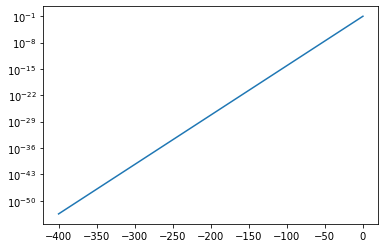

In [48]:
plt.semilogy(x,ni)
# plt.xlim([0,12])
# plt.ylim([1e-1,3.75])

In [104]:
x = np.linspace(0, 300, 3000)
n0 = 100
n = n0 * np.exp(-x/3.5)
n2 = 0.5 * np.exp(-x/50)

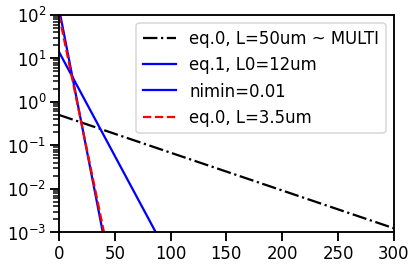

In [131]:
sns.set_context("talk")
plt.semilogy(x,n2,'-.k', label='eq.0, L=50um ~ MULTI')
plt.semilogy(x,ni,'-b',label='eq.1, L0=12um')
plt.semilogy(x,ni3,'-b',label='nimin=0.01')
plt.semilogy(x,n,'--r', label='eq.0, L=3.5um')
plt.xlim([0,300])
plt.ylim([1e-3,100])
plt.legend()
# plt.savefig("/Users/yz/Desktop/test.pdf")

In [130]:
nimax = 3.75
nimin = 1
l0 = 12.0
ni3 = nimax * np.exp(-np.log(nimax/nimin) * (x - l0) / (l0) )

In [68]:
np.log(nimax/nimin)

3.624340932976365